# Exercise 1 - Linear Regression
This notebook covers my solutions to Andrew Ng's Machine Learning course Exercise 1.

## Linear Regression with one variable
This exercise deals with implementing linear regression to predict profits for a food truck. The chain has food trucks in various cities and the data provided describes the profits and populations for each city.

Start with importing packages and loading and examining the data.

In [164]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load and examine data
path = os.path.join(os.getcwd(), 'data', 'ex1data1.txt')
data = pd.read_csv(path, header=None, names=['Population','Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


Create a statistical summary of the data

In [121]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


### Plotting the data
Since the data is 2D, let's plot it on a scatter plot

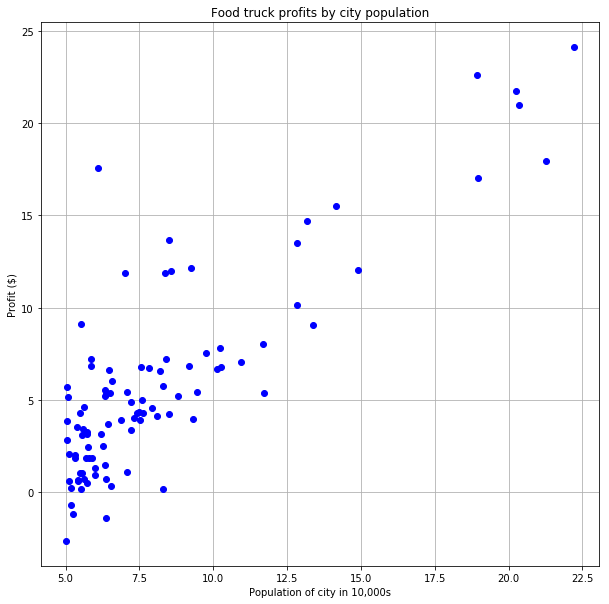

In [122]:
plt.figure(figsize=(10,10))
plt.plot(data['Population'], data['Profit'], 'bo')
plt.title('Food truck profits by city population')
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()

### Gradient Descent
The objective of this section is to fit the linear regression parameters $\theta_0$ and $\theta_1$ to the dataset using gradient descent.

First, let's define the cost function:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 $$

Where the hypothesis is given by:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x $$

In [139]:
def computeCost(X, y, theta):
    
    m = len(y)
    diff = np.power((X * theta.T) - y, 2)
    J = np.sum(diff)/(2*m)
    
    return J

Now to prepare the data to be passed into the cost function. 

Our data was originally imported as a dataframe and must be converted to separate matrices $X$ and $y$

In [165]:
# Insert column of ones to the feature set for theta_0
data.insert(0, 'theta_0', 1)

# Separate the feature set from the result parameter
X = np.matrix(data.iloc[:,0:2])
y = np.matrix(data.iloc[:,2])
y = y.T

# Some gradient descent settings
iterations = 1500
alpha = 0.01
theta = np.matrix(np.array([0,0]))

X.shape, y.shape, theta.shape

((97, 2), (97, 1), (1, 2))

Now, let's test the cost function on some examples

In [166]:
J = computeCost(X, y, theta)
print(J)

32.0727338775


Now let's define the function to run gradient descent

In [ ]:
def gradientDescent()

In [ ]:
theta = gradientDescent(X, y, theta, alpha, iterations);